**All librabries used**

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
from sklearn.decomposition import PCA


C:\Users\hiamr\AppData\Local\Temp\ipykernel_11112\321526161.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


*Fetching training and testing dataset*

In [3]:
# Training dataset and converting it into DataFrame
data_train = pd.read_csv("mnist_train.csv")
data_train = pd.DataFrame(data_train)

# Testing dataset 
data_test = pd.read_csv("mnist_test.csv")
data_test = pd.DataFrame(data_test)


Giving columns to training and testing samples

In [4]:
# for training samples
column_train = data_train.columns
data_train.columns =  np.arange(785)
# Shift the index
data_train.index = data_train.index + 1
# Sort the index
data_train = data_train.sort_index()
# Add the new row at index 0
data_train.loc[0] = column_train
# resetting the index
data_train = data_train.sort_index().reset_index(drop=True)
#  For testing samples
column_test = data_test.columns
data_test.columns =  np.arange(785)
data_test.index = data_test.index + 1
data_test = data_test.sort_index()
data_test.loc[0] = column_test
data_test = data_test.sort_index().reset_index(drop=True)

Divide the sample into features and target

In [5]:
# training target and features
data_train_target = data_train[0]
data_train_features = data_train.drop(0 , axis = 1)
# testing target and features
data_test_target = data_test[0]
data_test_features = data_test.drop(0 , axis = 1)

Converting the dataset into float array 

In [6]:
data_train_features = np.array(data_train_features)
data_train_target = np.array(data_train_target)
data_train_features = data_train_features.astype(float)
data_train_target = data_train_target.astype(int)

data_test_features = np.array(data_test_features)
data_test_target = np.array(data_test_target)
data_test_features = data_test_features.astype(float)
data_test_target = data_test_target.astype(int)


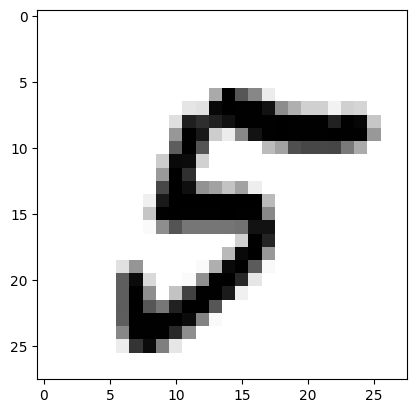

In [7]:

some_digit = data_train_features[34561]
some_digit_image = some_digit.reshape(28,28)


# Now you can plot the image
plt.imshow(some_digit_image , cmap = matplotlib.cm.binary , interpolation = "nearest")

In [7]:
print(data_train_target[34561])

5


Using KNN classifier

In [9]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(data_train_features, data_train_target)

data_test_predict = neigh.predict(data_test_features)
accuracy_knn = accuracy_score(data_test_predict , data_test_target)*100
print(f"The model accuracy when trained by KNN clasifier is {accuracy_knn}% ")

print("Knn Classification Report:\n",classification_report(data_test_target,data_test_predict))

The model accuracy when trained by KNN clasifier is 97.05% 
Knn Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.96      1.00      0.98      1135
           2       0.98      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.96      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



*Making a Model after training*

In [10]:
import joblib

# After training your KNN model
joblib.dump(neigh, 'knn_digit_recognizer.pkl')


['knn_digit_recognizer.pkl']

Using Decision Tree classifier

In [11]:
decision_classifier  = tree.DecisionTreeClassifier()
decision_classifier.fit(data_train_features,data_train_target)

data_test_predict = decision_classifier.predict(data_test_features)
accuracy_decision_tree = accuracy_score(data_test_predict , data_test_target)*100
print(f"The model accuracy when trained by Decision Tree Classifier {accuracy_decision_tree}%")

print("Decision Tree Classification Report:\n",classification_report(data_test_target,data_test_predict))

The model accuracy when trained by Decision Tree Classifier 87.72999999999999%
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       980
           1       0.95      0.97      0.96      1135
           2       0.88      0.86      0.87      1032
           3       0.84      0.85      0.85      1010
           4       0.88      0.87      0.88       982
           5       0.82      0.82      0.82       892
           6       0.88      0.89      0.88       958
           7       0.91      0.90      0.90      1028
           8       0.81      0.81      0.81       974
           9       0.85      0.85      0.85      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



*Making the model after training*

In [12]:
import joblib
joblib.dump(decision_classifier, 'decision_digit_recognizer.pkl')

['decision_digit_recognizer.pkl']

****Dimensionality reduction using PCA****

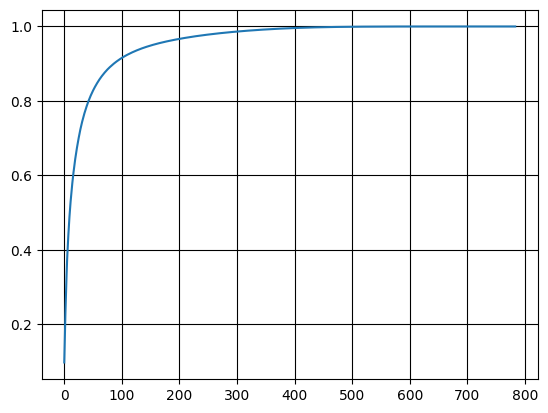

In [13]:
# Getting the value of n_components
n_components = None
pca = PCA(n_components=n_components, svd_solver="randomized", whiten=True, random_state=42).fit(data_train_features)
variance = pca.explained_variance_ratio_
sum = np.cumsum(variance)
plt.plot(sum)
plt.grid(True , color ='k')
plt.show()

In [26]:
joblib.dump(pca, "pca_model.pkl")

['pca_model.pkl']

Again using KNN classfier

In [15]:
# chossing a value of n_components from the above plot
n_components = 100
pca = PCA(n_components=n_components, svd_solver="randomized", whiten=True, random_state=42).fit(data_train_features)
data_train_features_pca = pca.transform(data_train_features)
data_test_features_pca = pca.transform(data_test_features)
neigh.fit(data_train_features_pca , data_train_target)
y_pred = neigh.predict(data_test_features_pca)
accuracy_pca_knn = accuracy_score(y_pred ,data_test_target)*100
print(f"The accuracy of model which is trained using KNN Classifier after the reduction of dimensions is {accuracy_pca_knn}%")

The accuracy of model which is trained using KNN Classifier after the reduction of dimensions is 94.08%


In [16]:
joblib.dump(neigh, 'KNN_pca_recognizer.pkl')

['KNN_pca_recognizer.pkl']

Again usnig Decision tree classifier 

In [17]:
decision_classifier.fit(data_train_features_pca , data_train_target)
y_pred = decision_classifier.predict(data_test_features_pca)
accuracy_pca_decision = accuracy_score(y_pred ,data_test_target)*100
print(f"The accuracy of model which is trained using decision tree Classifier after the reduction of dimensions is {accuracy_pca_decision}%")

The accuracy of model which is trained using decision tree Classifier after the reduction of dimensions is 83.84%


In [18]:
joblib.dump(decision_classifier, 'decision_digit_pca_recognizer.pkl')

['decision_digit_pca_recognizer.pkl']

**Training the model using SVM**

In [19]:
from sklearn.svm import SVC
svm_classifier = SVC()
svm_classifier.fit(data_train_features , data_train_target)

SVC()

In [20]:
y_pred = svm_classifier.predict(data_test_features)
accuracy_svm = accuracy_score(y_pred ,data_test_target)*100
print("Accuracy of SVM Classifier is : ",accuracy_svm)

Accuracy of SVM Classifier is :  97.92


In [21]:
joblib.dump(svm_classifier, 'svm_classifier_recognizer.pkl')

['svm_classifier_recognizer.pkl']

In [25]:
accuracy_trained_model = [accuracy_svm,accuracy_decision_tree,accuracy_pca_knn,accuracy_pca_decision,accuracy_svm]
for i in range(len(accuracy_trained_model)):
    print(f"The accuracy after training with model {i+1} is {accuracy_trained_model[i]}")

The accuracy after training with model 1 is 97.92
The accuracy after training with model 2 is 87.72999999999999
The accuracy after training with model 3 is 94.08
The accuracy after training with model 4 is 83.84
The accuracy after training with model 5 is 97.92
